In [2]:
from google.colab import files 
import pandas as pd 
import io
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor, OLSInfluence
from sklearn.model_selection import train_test_split 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
uploaded = files.upload()  
df = pd.read_csv(io.BytesIO(uploaded['train.csv'])) 

Saving train.csv to train.csv


,id_pasien,umur,rata2_level_glukosa,bmi,stroke
count,28075.00000,28075.000000,28075.000000,28075.000000,28075.000000
mean,114037.00000,47.576064,106.312906,30.059117,0.013642
std,8104.69874,18.706353,45.129944,7.199859,0.116002
min,100000.00000,10.000000,55.010000,10.100000,0.000000
25%,107018.50000,32.000000,77.660000,25.000000,0.000000
50%,114037.00000,48.000000,92.140000,28.900000,0.000000
75%,121055.50000,62.000000,113.850000,33.900000,0.000000
max,128074.00000,82.000000,291.050000,92.000000,1.000000


In [4]:
print(df.head())
df.describe()

   id_pasien jenis_kelamin  umur  ...   bmi         merokok stroke
0     100000     Laki-laki    43  ...  26.1  mantan perokok      0
1     100001     Perempuan    58  ...  21.2           tidak      0
2     100002     Laki-laki    29  ...  29.7           tidak      0
3     100003     Laki-laki    54  ...  27.7           tidak      0
4     100004     Laki-laki    78  ...  36.3  mantan perokok      0

[5 rows x 12 columns]


,id_pasien,umur,rata2_level_glukosa,bmi,stroke
count,28075.00000,28075.000000,28075.000000,28075.000000,28075.000000
mean,114037.00000,47.576064,106.312906,30.059117,0.013642
std,8104.69874,18.706353,45.129944,7.199859,0.116002
min,100000.00000,10.000000,55.010000,10.100000,0.000000
25%,107018.50000,32.000000,77.660000,25.000000,0.000000
50%,114037.00000,48.000000,92.140000,28.900000,0.000000
75%,121055.50000,62.000000,113.850000,33.900000,0.000000
max,128074.00000,82.000000,291.050000,92.000000,1.000000


In [ ]:
lb = preprocessing.LabelBinarizer()

df.jenis_kelamin = lb.fit_transform(df.jenis_kelamin)
df.hipertensi = lb.fit_transform(df.hipertensi)
df.penyakit_jantung = lb.fit_transform(df.penyakit_jantung)
df.sudah_menikah = lb.fit_transform(df.sudah_menikah)
df.jenis_pekerjaan = lb.fit_transform(df.jenis_pekerjaan)
df.jenis_tempat_tinggal = lb.fit_transform(df.jenis_tempat_tinggal)
df.merokok = lb.fit_transform(df.merokok)

df.head()

,id_pasien,jenis_kelamin,umur,hipertensi,penyakit_jantung,sudah_menikah,jenis_pekerjaan,jenis_tempat_tinggal,rata2_level_glukosa,bmi,merokok,stroke
0,100000,0,43,0,0,1,0,0,96.39,26.1,1,0
1,100001,1,58,0,0,1,0,0,114.07,21.2,0,0
2,100002,0,29,0,0,0,0,0,118.96,29.7,0,0
3,100003,0,54,0,0,1,0,1,73.01,27.7,0,0
4,100004,0,78,1,1,1,0,1,243.82,36.3,1,0


In [ ]:
del df['id_pasien']

df.head()

,jenis_kelamin,umur,hipertensi,penyakit_jantung,sudah_menikah,jenis_pekerjaan,jenis_tempat_tinggal,rata2_level_glukosa,bmi,merokok,stroke
0,0,43,0,0,1,0,0,96.39,26.1,1,0
1,1,58,0,0,1,0,0,114.07,21.2,0,0
2,0,29,0,0,0,0,0,118.96,29.7,0,0
3,0,54,0,0,1,0,1,73.01,27.7,0,0
4,0,78,1,1,1,0,1,243.82,36.3,1,0


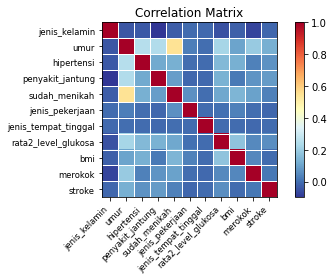

                      jenis_kelamin      umur  ...   merokok    stroke
jenis_kelamin              1.000000 -0.040555  ... -0.069822 -0.008249
umur                      -0.040555  1.000000  ...  0.197308  0.132180
hipertensi                -0.035599  0.255426  ...  0.038874  0.071166
penyakit_jantung          -0.098320  0.245667  ...  0.077122  0.089244
sudah_menikah             -0.028025  0.547023  ...  0.101096  0.036935
jenis_pekerjaan           -0.001670  0.031749  ...  0.000569 -0.009123
jenis_tempat_tinggal      -0.006956  0.003948  ... -0.008107 -0.001311
rata2_level_glukosa       -0.048913  0.226905  ...  0.055184  0.063854
bmi                       -0.021809  0.106021  ...  0.051796 -0.003904
merokok                   -0.069822  0.197308  ...  1.000000  0.019444
stroke                    -0.008249  0.132180  ...  0.019444  1.000000

[11 rows x 11 columns]


In [ ]:
import statsmodels.api as sm

corr = df.corr()
sm.graphics.plot_corr(corr, xnames = list(corr.columns))
plt.show()

print(corr)

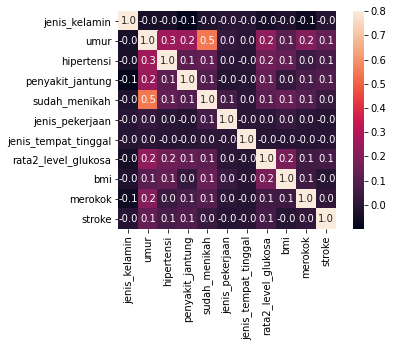

In [ ]:
import seaborn as sns

sns.heatmap(df.corr(), vmax = .8, square = True, annot = True, fmt = '.1f')
plt.show()

In [ ]:
independent_variables = ['jenis_kelamin', 'umur', 'hipertensi','penyakit_jantung', 'sudah_menikah',
                         'jenis_pekerjaan','jenis_tempat_tinggal','rata2_level_glukosa','bmi', 'merokok']

# Use the list to select a subset from original DataFrame
X = df[independent_variables]
y = df['stroke']

thresh = 10

for i in np.arange(0, len(independent_variables)):
    vif = [variance_inflation_factor(X[independent_variables].values, ix) for ix in range(X[independent_variables].shape[1])]
    maxloc = vif.index(max(vif))
    if max(vif) > thresh:
        print('vif:', vif)
        print('dropping \'' + X[independent_variables].columns[maxloc] + '\' at index: ' + str(maxloc))
        del independent_variables[maxloc]
    else:
        break

print('Final variables:', independent_variables)

vif: [2.438488200283946, 11.112073001617276, 1.2032697417651022, 1.1414751161453869, 5.709328601357545, 1.1741367782665637, 1.9338869361771296, 6.716529753395652, 10.0009634886312, 1.3819421249361608]
dropping 'umur' at index: 1
Final variables: ['jenis_kelamin', 'hipertensi', 'penyakit_jantung', 'sudah_menikah', 'jenis_pekerjaan', 'jenis_tempat_tinggal', 'rata2_level_glukosa', 'bmi', 'merokok']


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression


# Use the list to select a subset from original DataFrame
X = df[independent_variables]
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .75, random_state = 1)


logreg = LogisticRegression()
scaler = MinMaxScaler()

#transform
X_train= scaler.fit_transform(X_train)
#scaller ke x_test
X_test = scaler.transform(X_test)


logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:


print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.99
Accuracy of Logistic regression classifier on test set: 0.99


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.97


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.99
Accuracy of K-NN classifier on test set: 0.99


In [ ]:
x = pd.read_csv(io.BytesIO(uploaded['data_test.csv']))  
x['jenis_kelamin'] = lb.fit_transform(x['jenis_kelamin'])
x['hipertensi'] = lb.fit_transform(x['hipertensi'])
x['penyakit_jantung'] = lb.fit_transform(x['penyakit_jantung'])
x['sudah_menikah'] = lb.fit_transform(x['sudah_menikah'])
x['jenis_pekerjaan'] = lb.fit_transform(x['jenis_pekerjaan'])
x['jenis_tempat_tinggal'] = lb.fit_transform(x['jenis_tempat_tinggal'])
x['merokok'] = lb.fit_transform(x['merokok'])
del x['id_pasien']
del x['umur']
y_pred = knn.predict(x)
x.head()

,jenis_kelamin,hipertensi,penyakit_jantung,sudah_menikah,jenis_pekerjaan,jenis_tempat_tinggal,rata2_level_glukosa,bmi,merokok
0,0,0,0,0,0,1,83.45,25.3,0
1,1,0,0,1,0,1,127.35,35.6,1
2,0,0,0,1,1,0,65.00,21.0,0
3,0,0,0,1,0,1,88.30,32.0,0
4,0,1,0,1,0,1,63.15,25.1,0


In [ ]:
x['stroke_pred'] = y_pred

,jenis_kelamin,hipertensi,penyakit_jantung,sudah_menikah,jenis_pekerjaan,jenis_tempat_tinggal,rata2_level_glukosa,bmi,merokok,stroke_pred
0,0,0,0,0,0,1,83.45,25.3,0,0
1,1,0,0,1,0,1,127.35,35.6,1,0
2,0,0,0,1,1,0,65.00,21.0,0,0
3,0,0,0,1,0,1,88.30,32.0,0,0
4,0,1,0,1,0,1,63.15,25.1,0,0


In [ ]:
from google.colab import files

toy = pd.read_csv(io.BytesIO(uploaded['data_test.csv']))
del toy['jenis_kelamin']
del toy['umur']
del toy['hipertensi']
del toy['penyakit_jantung']
del toy['sudah_menikah']
del toy['jenis_pekerjaan']
del toy['jenis_tempat_tinggal']
del toy['rata2_level_glukosa']
del toy['bmi']
del toy['merokok']

toy['stroke'] = y_pred

toy.head()
toy.to_csv('submission.csv', index=False)
files.download("submission.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>